# Stock Price Prediction Using Machine learning: An Application of the Random Forest Model

## Prepered by Emre Aktürk

In this project, I build a machine learning model that predicts the daily direction of movement of the price of Boeing stock.

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score

In [3]:
# By initializing a ticker class we download the information of a single stock
# By specifying BA the stock information of Boeing is downloaded

Boeing = yf.Ticker("BA")

# Get historical stock data for Boeing for the maximum available period by specifiying max

Boeing = Boeing.history(period="max")

The reason for using Boeing is because as it is one of the oldest companys in the stock market it contains vast amount of daily historical data.

In [4]:
Boeing

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02 00:00:00-05:00,0.194272,0.194272,0.190931,0.190931,352350,0.0,0.0
1962-01-03 00:00:00-05:00,0.193795,0.197614,0.193795,0.194750,710775,0.0,0.0
1962-01-04 00:00:00-05:00,0.194749,0.198091,0.192840,0.192840,911250,0.0,0.0
1962-01-05 00:00:00-05:00,0.192840,0.193795,0.183771,0.189022,880875,0.0,0.0
1962-01-08 00:00:00-05:00,0.189022,0.192363,0.186635,0.189499,473850,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-11 00:00:00-05:00,228.070007,228.279999,222.619995,222.660004,11830500,0.0,0.0
2024-01-12 00:00:00-05:00,219.970001,222.070007,217.039993,217.699997,11268800,0.0,0.0
2024-01-16 00:00:00-05:00,210.070007,210.979996,199.500000,200.520004,35290000,0.0,0.0


In [5]:
# Download the information for S&P 500 by specifying ^GSPC

sp500 = yf.Ticker("^GSPC")

# Get historical data from S&P starting from 1962

sp500 = sp500.history(start="1962-01-02")

In [6]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02 00:00:00-05:00,0.000000,71.959999,70.709999,70.959999,3120000,0.0,0.0
1962-01-03 00:00:00-05:00,0.000000,71.480003,70.379997,71.129997,3590000,0.0,0.0
1962-01-04 00:00:00-05:00,0.000000,71.620003,70.449997,70.639999,4450000,0.0,0.0
1962-01-05 00:00:00-05:00,0.000000,70.839996,69.349998,69.660004,4630000,0.0,0.0
1962-01-08 00:00:00-05:00,0.000000,69.839996,68.169998,69.120003,4620000,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-11 00:00:00-05:00,4792.129883,4798.500000,4739.580078,4780.240234,3759890000,0.0,0.0
2024-01-12 00:00:00-05:00,4791.180176,4802.399902,4768.979980,4783.830078,3486340000,0.0,0.0
2024-01-16 00:00:00-05:00,4772.350098,4782.339844,4747.120117,4765.979980,4260550000,0.0,0.0


In [7]:
# Delete the unneccesary columns in S&P 500

del sp500["Open"]
del sp500["High"]
del sp500["Low"]
del sp500["Volume"]
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
# Rename the Close column as Close (sp500)

sp500 = sp500.rename(columns={'Close': 'Close (sp500)'})

In [9]:
sp500

,Close (sp500)
Date,
1962-01-02 00:00:00-05:00,70.959999
1962-01-03 00:00:00-05:00,71.129997
1962-01-04 00:00:00-05:00,70.639999
1962-01-05 00:00:00-05:00,69.660004
1962-01-08 00:00:00-05:00,69.120003
...,...
2024-01-11 00:00:00-05:00,4780.240234
2024-01-12 00:00:00-05:00,4783.830078
2024-01-16 00:00:00-05:00,4765.979980


In [10]:
# Append the S&P table with the Boeing table

Boeing = pd.concat([Boeing, sp500], axis=1)

In [11]:
Boeing

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close (sp500)
Date,,,,,,,,
1962-01-02 00:00:00-05:00,0.194272,0.194272,0.190931,0.190931,352350,0.0,0.0,70.959999
1962-01-03 00:00:00-05:00,0.193795,0.197614,0.193795,0.194750,710775,0.0,0.0,71.129997
1962-01-04 00:00:00-05:00,0.194749,0.198091,0.192840,0.192840,911250,0.0,0.0,70.639999
1962-01-05 00:00:00-05:00,0.192840,0.193795,0.183771,0.189022,880875,0.0,0.0,69.660004
1962-01-08 00:00:00-05:00,0.189022,0.192363,0.186635,0.189499,473850,0.0,0.0,69.120003
...,...,...,...,...,...,...,...,...
2024-01-11 00:00:00-05:00,228.070007,228.279999,222.619995,222.660004,11830500,0.0,0.0,4780.240234
2024-01-12 00:00:00-05:00,219.970001,222.070007,217.039993,217.699997,11268800,0.0,0.0,4783.830078
2024-01-16 00:00:00-05:00,210.070007,210.979996,199.500000,200.520004,35290000,0.0,0.0,4765.979980


Before starting with the cleaning or analysis we should plot and visulize our data.

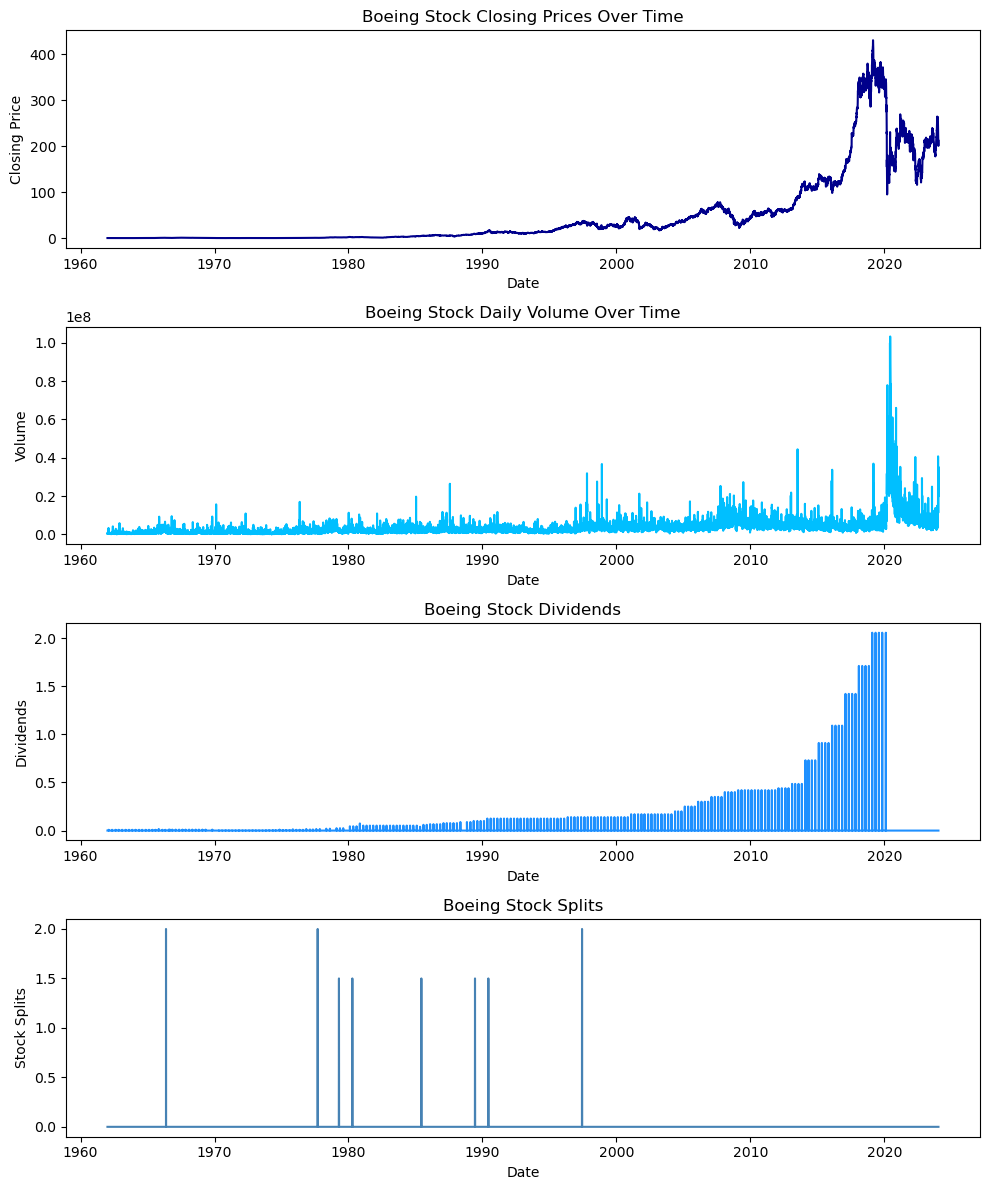

In [12]:
# Create a figure with four subplots to show Boeing data

fig, axes = plt.subplots(4, 1, figsize=(10, 12))

# Plot the closing prices
axes[0].plot(Boeing.index, Boeing["Close"], color="darkblue")
axes[0].set_title("Boeing Stock Closing Prices Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Closing Price")

# Plot the volume
axes[1].plot(Boeing.index, Boeing["Volume"], color="deepskyblue")
axes[1].set_title("Boeing Stock Daily Volume Over Time")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Volume")

# Plot the Dividends
axes[2].plot(Boeing.index, Boeing["Dividends"], color="dodgerblue")
axes[2].set_title("Boeing Stock Dividends")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Dividends")

# Plot the Stock Splits
axes[3].plot(Boeing.index, Boeing["Stock Splits"], color="steelblue")
axes[3].set_title("Boeing Stock Splits")
axes[3].set_xlabel("Date")
axes[3].set_ylabel("Stock Splits")

plt.tight_layout()

plt.show()

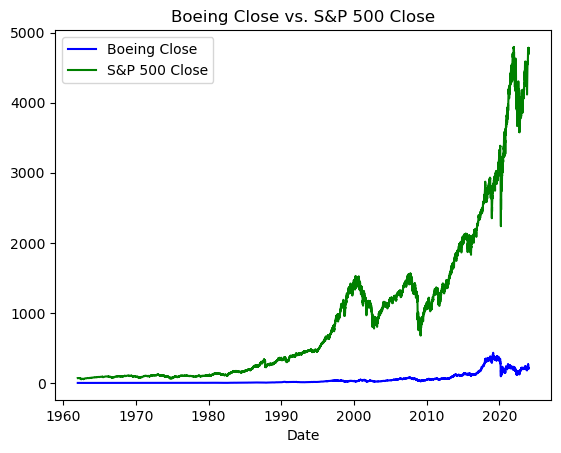

In [13]:
# Create a figure to examine the relation between Boeing and S&P 500 overtime

# Plot the "close" column
plt.plot(Boeing.index, Boeing["Close"], label="Boeing Close", color="blue")

# Plot the "close (sp500)" column
plt.plot(Boeing.index, Boeing["Close (sp500)"], label="S&P 500 Close", color="green")

plt.xlabel("Date")
plt.title("Boeing Close vs. S&P 500 Close")
plt.legend()

plt.show()

The model will predict if the stock price will go up or down.

In [14]:
# Tommorow column which has the closing price of the next day is created, which is done by taking the close column and "shifting" all the prices one day

Boeing["Tomorrow"] = Boeing["Close"].shift(periods=-1)

# "Direction" column is created to indicate if tommorow the stock price increased or decreassed

Boeing["Direction"] = np.where(Boeing["Tomorrow"] > Boeing["Close"], "Rise", "Fall")

In [15]:
Boeing

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close (sp500),Tomorrow,Direction
Date,,,,,,,,,,
1962-01-02 00:00:00-05:00,0.194272,0.194272,0.190931,0.190931,352350,0.0,0.0,70.959999,0.194750,Rise
1962-01-03 00:00:00-05:00,0.193795,0.197614,0.193795,0.194750,710775,0.0,0.0,71.129997,0.192840,Fall
1962-01-04 00:00:00-05:00,0.194749,0.198091,0.192840,0.192840,911250,0.0,0.0,70.639999,0.189022,Fall
1962-01-05 00:00:00-05:00,0.192840,0.193795,0.183771,0.189022,880875,0.0,0.0,69.660004,0.189499,Rise
1962-01-08 00:00:00-05:00,0.189022,0.192363,0.186635,0.189499,473850,0.0,0.0,69.120003,0.189976,Rise
...,...,...,...,...,...,...,...,...,...,...
2024-01-11 00:00:00-05:00,228.070007,228.279999,222.619995,222.660004,11830500,0.0,0.0,4780.240234,217.699997,Fall
2024-01-12 00:00:00-05:00,219.970001,222.070007,217.039993,217.699997,11268800,0.0,0.0,4783.830078,200.520004,Fall
2024-01-16 00:00:00-05:00,210.070007,210.979996,199.500000,200.520004,35290000,0.0,0.0,4765.979980,203.059998,Rise


It is more convienient to code with numeric binary variables (i.e. 0 and 1) so I will convert the Direction column such that when the price rises it gets one and when it falls it gets 0.

In [16]:
# Direction column is converted to binary (0 and 1)

Boeing["Direction"] = Boeing["Direction"].replace({"Rise": 1, "Fall": 0})

In [17]:
Boeing

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close (sp500),Tomorrow,Direction
Date,,,,,,,,,,
1962-01-02 00:00:00-05:00,0.194272,0.194272,0.190931,0.190931,352350,0.0,0.0,70.959999,0.194750,1
1962-01-03 00:00:00-05:00,0.193795,0.197614,0.193795,0.194750,710775,0.0,0.0,71.129997,0.192840,0
1962-01-04 00:00:00-05:00,0.194749,0.198091,0.192840,0.192840,911250,0.0,0.0,70.639999,0.189022,0
1962-01-05 00:00:00-05:00,0.192840,0.193795,0.183771,0.189022,880875,0.0,0.0,69.660004,0.189499,1
1962-01-08 00:00:00-05:00,0.189022,0.192363,0.186635,0.189499,473850,0.0,0.0,69.120003,0.189976,1
...,...,...,...,...,...,...,...,...,...,...
2024-01-11 00:00:00-05:00,228.070007,228.279999,222.619995,222.660004,11830500,0.0,0.0,4780.240234,217.699997,0
2024-01-12 00:00:00-05:00,219.970001,222.070007,217.039993,217.699997,11268800,0.0,0.0,4783.830078,200.520004,0
2024-01-16 00:00:00-05:00,210.070007,210.979996,199.500000,200.520004,35290000,0.0,0.0,4765.979980,203.059998,1


In [18]:
# Drop the observation with NaN

Boeing = Boeing.dropna()

In [19]:
Boeing

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close (sp500),Tomorrow,Direction
Date,,,,,,,,,,
1962-01-02 00:00:00-05:00,0.194272,0.194272,0.190931,0.190931,352350,0.0,0.0,70.959999,0.194750,1
1962-01-03 00:00:00-05:00,0.193795,0.197614,0.193795,0.194750,710775,0.0,0.0,71.129997,0.192840,0
1962-01-04 00:00:00-05:00,0.194749,0.198091,0.192840,0.192840,911250,0.0,0.0,70.639999,0.189022,0
1962-01-05 00:00:00-05:00,0.192840,0.193795,0.183771,0.189022,880875,0.0,0.0,69.660004,0.189499,1
1962-01-08 00:00:00-05:00,0.189022,0.192363,0.186635,0.189499,473850,0.0,0.0,69.120003,0.189976,1
...,...,...,...,...,...,...,...,...,...,...
2024-01-10 00:00:00-05:00,226.899994,231.610001,226.639999,227.839996,12883700,0.0,0.0,4783.450195,222.660004,0
2024-01-11 00:00:00-05:00,228.070007,228.279999,222.619995,222.660004,11830500,0.0,0.0,4780.240234,217.699997,0
2024-01-12 00:00:00-05:00,219.970001,222.070007,217.039993,217.699997,11268800,0.0,0.0,4783.830078,200.520004,0


Our data is clean and ready.
<br>
<br>
Now we set the machine learning model.
<br>
<br>
For this project Random Forest Model will be used. This model is suitable for this assignment for several reasons. Firstly, Random Forest Model is able to capture non-linear relationships, it is less likely to exhibit overfitting and many studies show that it is more successful than other models in the prediction of stock price movements.

In [20]:
# Create a Random Forest Classifier model with specified parameters

# n_estimators is the number of individual decision tree's we want to train, the higher the better for accurancy but also can lead to overfitting. So, there is a tradeoff
# min_sample_split is to protect against overfitting. The higher it is set, the less accurate the model will be but the less it will overfit. So, there is a tradeoff
# random_state is about randomization. when we set it to 42 (or any number), if we run the same model twice the random numbers generated will be in a predictable sequence. This is important because when we update and improve the model we can know it is not random

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=42)


# Split the dataframe into a training set (all values excluding the last 150 rows) and a test set (last 150 rows)
train = Boeing.iloc[:-150]
test = Boeing.iloc[-150:]

# Define the predictors of the model
predictors = ["Open", "Close", "Volume", "High", "Low", "Dividends","Stock Splits", "Close (sp500)"]

# Train the model using the defined predictors and target variable
model.fit(train[predictors], train["Direction"])

RandomForestClassifier(min_samples_split=100, random_state=42)

In [21]:
# Make predictions on the test data using the trained model

initial_predictions = model.predict(test[predictors])

In [22]:
# Display the 150 predictions

initial_predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
# Create a Pandas Series for model predictions
# This is done because it will be easier to read it

initial_predictions = pd.Series(initial_predictions, index=test.index)

In [24]:
initial_predictions

Date
2023-06-13 00:00:00-04:00    0
2023-06-14 00:00:00-04:00    0
2023-06-15 00:00:00-04:00    0
2023-06-16 00:00:00-04:00    0
2023-06-20 00:00:00-04:00    0
                            ..
2024-01-10 00:00:00-05:00    0
2024-01-11 00:00:00-05:00    0
2024-01-12 00:00:00-05:00    0
2024-01-16 00:00:00-05:00    0
2024-01-17 00:00:00-05:00    0
Length: 150, dtype: int64

In [25]:
# Combine the actual directions and model the predictions into a dataframe to compare them

comparison_table = pd.concat([test["Direction"], pd.Series(initial_predictions, name="Predicted Direction")], axis=1)

# Add a "Comparison" column which compares the actual direction to the prediction and evaluates whether the prediction was correct

comparison_table = comparison_table.assign(Comparison=lambda x: np.where(x["Direction"] == x["Predicted Direction"], "Correct", "Wrong"))

In [26]:
comparison_table

,Direction,Predicted Direction,Comparison
Date,,,
2023-06-13 00:00:00-04:00,0,0,Correct
2023-06-14 00:00:00-04:00,1,0,Wrong
2023-06-15 00:00:00-04:00,1,0,Wrong
2023-06-16 00:00:00-04:00,0,0,Correct
2023-06-20 00:00:00-04:00,0,0,Correct
...,...,...,...
2024-01-10 00:00:00-05:00,0,0,Correct
2024-01-11 00:00:00-05:00,0,0,Correct
2024-01-12 00:00:00-05:00,0,0,Correct


Now we must mesaure how accurate our model is.
<br>
This is done by examining the precision score and rate of correct predictions.

In [27]:
# Calculate the precision score for the models predictions
# This measures the accuracy of positive predictions made by the model
# Specifically, it shows the rate of when the market actually went up, when the model said it will go up

from sklearn.metrics import precision_score

precision_score = precision_score(test["Direction"], initial_predictions)

print("The precision score is", precision_score)

num_correct = (comparison_table["Comparison"] == "Correct").sum()

print("The Number of total Predictions is", 150)
print("The Number of Correct Predictions is", num_correct)

correct_rate = (num_correct / 150) * 100

print("The Percentage of Correct Predictions", correct_rate, "%")

The precision score is 0.48484848484848486
The Number of total Predictions is 150
The Number of Correct Predictions is 71
The Percentage of Correct Predictions 47.333333333333336 %


The rate of correct predictions and precision score is not very high.

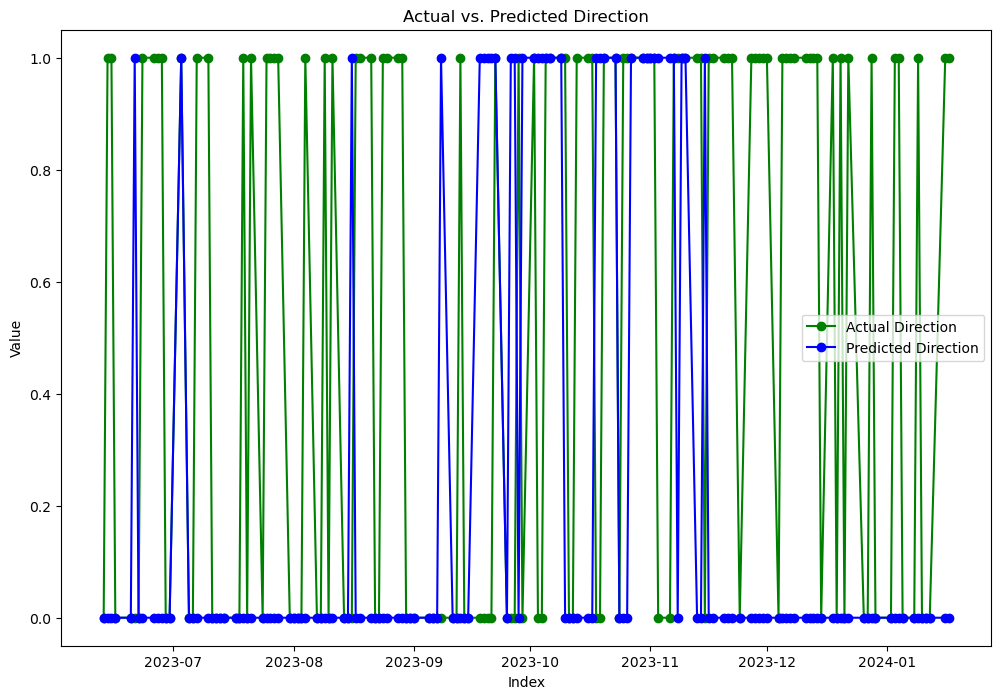

In [28]:
# Create a plot to visualize the comparison

# Combine the actual target values and model predictions into a dataframe
combined = pd.concat([test["Direction"], pd.Series(initial_predictions, name="Predicted_Target")], axis=1)

plt.figure(figsize=(12, 8))

plt.plot(combined.index, combined["Direction"], label="Actual Direction", color="green", marker="o")

plt.plot(combined.index, combined["Predicted_Target"], label="Predicted Direction", color="blue", marker="o")

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Direction")
plt.legend()
plt.show()

The model currently tests only against the last 150 days. But it can test across multiple years of data.
<br>
Next, a more robust testing algorithm is built. Thus, backtesting is done.

In [29]:
# Before backtesting, a prediction function is created which considers everything done so far in one function

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Direction"])
    initial_predictions = model.predict(test[predictors])
    comparison_table = pd.DataFrame({"Direction": test["Direction"], "Predictions": initial_predictions})
    return comparison_table

In [30]:
# Define a backtesting function that iteratively trains and tests a model on rolling windows of data

# "data" : The Beoing data
# "model" : The defined random forest model
# "predictors" : The defined predictors
# "start" : The start value says for the first model take the first 1250 observations (so it is 5 year of data since in 1 year there is about 250 trading days)
# "step" : Step says that we train a model for a year and then go to the the next year and next year and so on

# So what this function will do is take the first 5 years of data and predict values for the 6th year, then take the values of the first 6 years of data and make predictons for the 7th year and so on
# By having predictions for many years we will have more confidence in the model

def backtest(data, model, predictors, start=1250, step=250):
    all_predictions = [
        predict(data.iloc[0:i], data.iloc[i:(i+step)], predictors, model)
        .assign(Comparison=lambda df: np.where(df["Direction"] == df["Predictions"], "Correct", "Wrong"))
        for i in range(start, data.shape[0], step)
    ]
    
    return pd.concat(all_predictions)

In [31]:
# Perform a backtest on the Boeing data using the specified model and predictors

predictions = backtest(Boeing, model, predictors)
# Takes time

In [32]:
predictions

,Direction,Predictions,Comparison
Date,,,
1966-12-16 00:00:00-05:00,1,0,Wrong
1966-12-19 00:00:00-05:00,0,0,Correct
1966-12-20 00:00:00-05:00,0,0,Correct
1966-12-21 00:00:00-05:00,1,0,Wrong
1966-12-22 00:00:00-05:00,0,0,Correct
...,...,...,...
2024-01-10 00:00:00-05:00,0,0,Correct
2024-01-11 00:00:00-05:00,0,0,Correct
2024-01-12 00:00:00-05:00,0,0,Correct


In [33]:
# Count how many days the model predicted the stock will go up and down

predicted_1 = (predictions["Predictions"] == 1).sum()
predicted_0 = (predictions["Predictions"] == 0).sum()

print("Number of predictions of price rise:", predicted_1)
print("Number of predictions of price fall:", predicted_0)

Number of predictions of price rise: 3831
Number of predictions of price fall: 10536


In [34]:
# Examine the predictiveness of the model by calculating the precision and rate of correct predictions

from sklearn.metrics import precision_score

precision = precision_score(predictions["Direction"], predictions["Predictions"])

total_predictions = len(predictions)

total_correct_predictions = (predictions["Comparison"] == "Correct").sum()
correct_prediction_rate = (total_correct_predictions / total_predictions) * 100

print("The precision score is:", precision)
print("The Total Number of Predictions is:", total_predictions)
print("The Total Number of Correct Predictions:", total_correct_predictions)
print("The Rate of Correct Prediction is:", correct_prediction_rate, "%")

The precision score is: 0.4782041242495432
The Total Number of Predictions is: 14367
The Total Number of Correct Predictions: 7339
The Rate of Correct Prediction is: 51.08234147699589 %


With 0.5 precision and 50% correct predictions, predictiveness when backtested is revealed to be low.

Next, the model is improved by adding new predictors, changing model parameters and updating the structure of the prediction function with the aim of increasing its predictability.

First, new predictors are added to the model.

In [35]:
# The horizons are for the rolling means of the closing price for the last 2 days, 5 days (trading week), 60 days (trading quarter), 250 days (trading year), 500 days and 1000 days
# Then we will find the ratio between todays closing price and the closing price between those periods

# Define a list of time horizons for rolling average calculations
horizons = [2, 5, 60, 250, 500, 1000]

new_predictors = []

# Iterate through the specified time horizons
for horizon in horizons:
    # Calculate rolling averages for the specified horizon
    rolling_averages = Boeing["Close"].rolling(window=horizon).mean()
    
    # Create a new column which gives close price of Boeing stock divided by the rolling average for the specified horizon
    ratio_column = f"Close Ratio {horizon}"
    Boeing[ratio_column] = Boeing["Close"] / rolling_averages
    
    # Create a new column which gives the number of days that the stock price went up in the specified horizon
    trend_column = f"Trend {horizon}"
    Boeing[trend_column] = Boeing["Direction"].shift(1).rolling(window=horizon).sum()
    
    new_predictors.append(ratio_column)
    new_predictors.append(trend_column)

/var/folders/6w/3b4_nzw94txgmqr1rpfknnpm0000gn/T/ipykernel_33978/2321461083.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Boeing[ratio_column] = Boeing["Close"] / rolling_averages
/var/folders/6w/3b4_nzw94txgmqr1rpfknnpm0000gn/T/ipykernel_33978/2321461083.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Boeing[trend_column] = Boeing["Direction"].shift(1).rolling(window=horizon).sum()
/var/folders/6w/3b4_nzw94txgmqr1rpfknnpm0000gn/T/ipykernel_33978/2321461083.py:16: SettingWithCopyWarning: 
A valu

In [36]:
# Create a new column called rate which gives the rate of Boeings closing price divided by the close of S&P 500

Boeing["Rate"] = Boeing["Close"] / Boeing["Close (sp500)"]

/var/folders/6w/3b4_nzw94txgmqr1rpfknnpm0000gn/T/ipykernel_33978/807137399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Boeing["Rate"] = Boeing["Close"] / Boeing["Close (sp500)"]


In [37]:
# Rate is inculded into the list of predictors

new_predictors.append("Rate")

In [38]:
new_predictors

['Close Ratio 2',
 'Trend 2',
 'Close Ratio 5',
 'Trend 5',
 'Close Ratio 60',
 'Trend 60',
 'Close Ratio 250',
 'Trend 250',
 'Close Ratio 500',
 'Trend 500',
 'Close Ratio 1000',
 'Trend 1000',
 'Rate']

In [39]:
Boeing

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close (sp500),Tomorrow,Direction,...,Trend 5,Close Ratio 60,Trend 60,Close Ratio 250,Trend 250,Close Ratio 500,Trend 500,Close Ratio 1000,Trend 1000,Rate
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02 00:00:00-05:00,0.194272,0.194272,0.190931,0.190931,352350,0.0,0.0,70.959999,0.194750,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002691
1962-01-03 00:00:00-05:00,0.193795,0.197614,0.193795,0.194750,710775,0.0,0.0,71.129997,0.192840,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002738
1962-01-04 00:00:00-05:00,0.194749,0.198091,0.192840,0.192840,911250,0.0,0.0,70.639999,0.189022,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002730
1962-01-05 00:00:00-05:00,0.192840,0.193795,0.183771,0.189022,880875,0.0,0.0,69.660004,0.189499,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002713
1962-01-08 00:00:00-05:00,0.189022,0.192363,0.186635,0.189499,473850,0.0,0.0,69.120003,0.189976,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-10 00:00:00-05:00,226.899994,231.610001,226.639999,227.839996,12883700,0.0,0.0,4783.450195,222.660004,0,...,3.0,1.031386,43.0,1.069673,134.0,1.202990,262.0,1.147674,490.0,0.047631
2024-01-11 00:00:00-05:00,228.070007,228.279999,222.619995,222.660004,11830500,0.0,0.0,4780.240234,217.699997,0,...,2.0,1.005076,42.0,1.045190,133.0,1.175655,261.0,1.122059,490.0,0.046579
2024-01-12 00:00:00-05:00,219.970001,222.070007,217.039993,217.699997,11268800,0.0,0.0,4783.830078,200.520004,0,...,1.0,0.980319,41.0,1.021838,133.0,1.149566,260.0,1.097607,489.0,0.045507


In [40]:
# When the horizon is not long enough it can not compute the rolling average or trend and it gives NaN (missing values)
# Drop the NaN

Boeing = Boeing.dropna()

In [41]:
# Delete the columns that are no longer relevant

del Boeing["Open"]
del Boeing["Dividends"]
del Boeing["Stock Splits"]
del Boeing["High"]
del Boeing["Low"]
del Boeing["Volume"]

In [42]:
Boeing

,Close,Close (sp500),Tomorrow,Direction,Close Ratio 2,Trend 2,Close Ratio 5,Trend 5,Close Ratio 60,Trend 60,Close Ratio 250,Trend 250,Close Ratio 500,Trend 500,Close Ratio 1000,Trend 1000,Rate
Date,,,,,,,,,,,,,,,,,
1965-12-21 00:00:00-05:00,0.604024,92.010002,0.588188,0,0.996269,0.0,0.977664,0.0,1.105911,32.0,1.606581,122.0,1.996698,255.0,2.613909,465.0,0.006565
1965-12-22 00:00:00-05:00,0.588188,92.290001,0.581401,0,0.986717,0.0,0.964213,0.0,1.072922,31.0,1.559678,122.0,1.938759,255.0,2.541053,464.0,0.006373
1965-12-23 00:00:00-05:00,0.581401,92.190002,0.584794,1,0.994197,0.0,0.966892,0.0,1.057379,30.0,1.537110,121.0,1.910971,255.0,2.507523,464.0,0.006307
1965-12-27 00:00:00-05:00,0.584794,91.519997,0.572917,0,1.002910,1.0,0.985513,1.0,1.059633,31.0,1.541528,121.0,1.916712,255.0,2.517861,465.0,0.006390
1965-12-28 00:00:00-05:00,0.572917,91.529999,0.581967,1,0.989741,1.0,0.977233,1.0,1.034235,31.0,1.505983,120.0,1.872689,254.0,2.462659,464.0,0.006259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-10 00:00:00-05:00,227.839996,4783.450195,222.660004,0,1.004586,1.0,0.968263,3.0,1.031386,43.0,1.069673,134.0,1.202990,262.0,1.147674,490.0,0.047631
2024-01-11 00:00:00-05:00,222.660004,4780.240234,217.699997,0,0.988502,1.0,0.964514,2.0,1.005076,42.0,1.045190,133.0,1.175655,261.0,1.122059,490.0,0.046579
2024-01-12 00:00:00-05:00,217.699997,4783.830078,200.520004,0,0.988736,0.0,0.969313,1.0,0.980319,41.0,1.021838,133.0,1.149566,260.0,1.097607,489.0,0.045507


Here what we do is:
<br>
<br>
For **Close Ratio** consider Close Ratio 2 in 1965-12-22
<br>
Close Ratio 2 = 0.986717 which comes from:
<br>
Closing price of 1965-12-22/((Closing_price_of_1965-12-21 + Closing price of 1965-12-22)/2)
<br>
0.588188 / ((0.604023 + 0.588188)/2) = 0.986717
<br>
<br>
For **Trend** condider Trend 2 in 1965-12-23
<br>
Trend 2 = 0 which comes from:
<br>
(Direction in 1965-12-21) + (Direction in 1965-12-22) = 0 + 0 = 0
<br>
<br>
For **Rate**, consider Rate in 1965-12-22.
<br>
Rate = 0.006373 which comes from:
<br>
(Closing price of Boeing in 1965-12-22)/(Closing price of S&P in 1965-12-22) = 0.588188/92.290001 = 0.006373
<br>
<br>
Realize that for close ratio and rate the values of the current day is included whereas for trend only previous days are included. This is because trend is based on the comparison between today and tommorwos price and we cannot take advantage of tommorows price as inputs.
<br>
<br>
Realize that now the data starts from 1965. This is because some time is needed for the longest horizon to be calculated without giving a NaN.

First we visulize and plot the new columns.

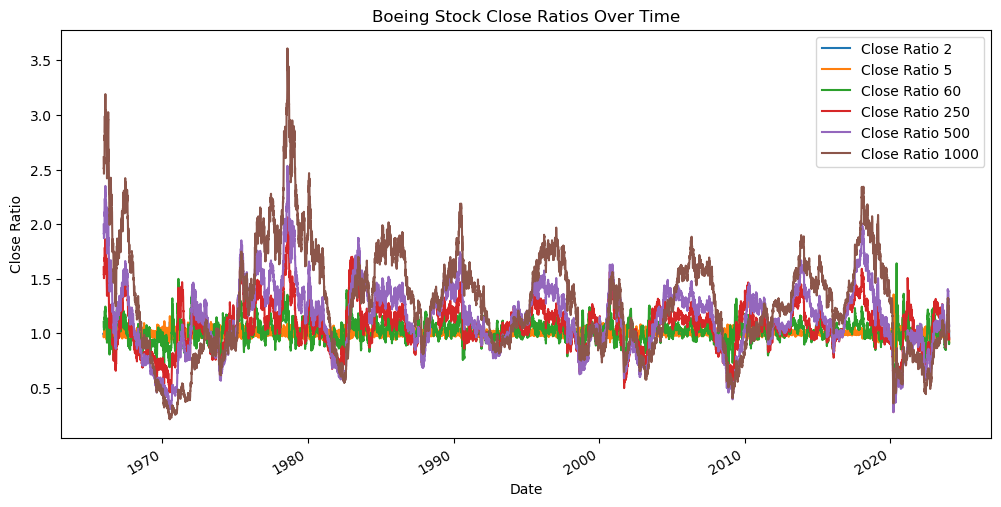

In [43]:
# Create a figure to visualize the Close Ratio's

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the Close ratio columns
Boeing[["Close Ratio 2", "Close Ratio 5", "Close Ratio 60", "Close Ratio 250", "Close Ratio 500", "Close Ratio 1000"]].plot(ax=ax)

ax.set_title("Boeing Stock Close Ratios Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Close Ratio")

ax.legend(["Close Ratio 2", "Close Ratio 5", "Close Ratio 60", "Close Ratio 250", "Close Ratio 500", "Close Ratio 1000"])

plt.show()

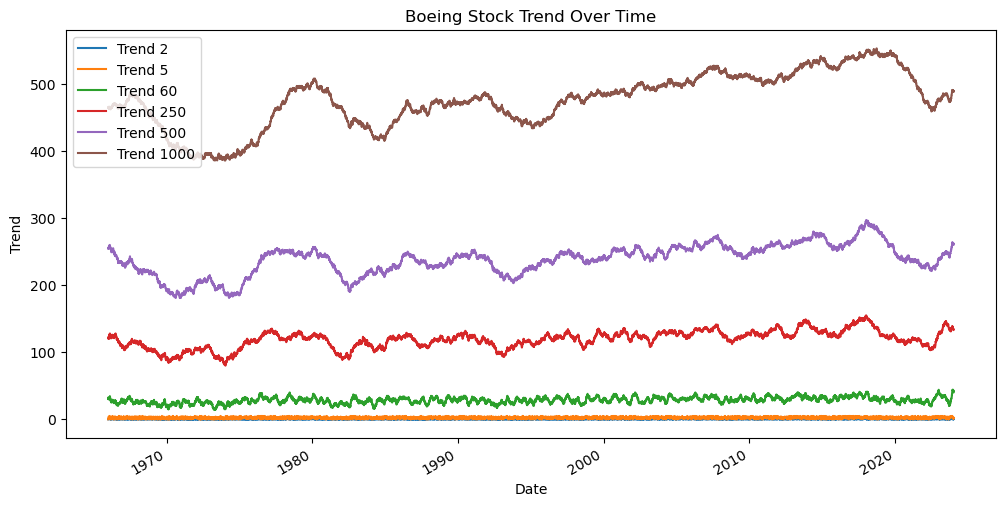

In [44]:
# Create a figure to visualize the Trends's

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the Trend columns
Boeing[["Trend 2", "Trend 5", "Trend 60", "Trend 250", "Trend 500", "Trend 1000"]].plot(ax=ax)

ax.set_title("Boeing Stock Trend Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Trend")

ax.legend(["Trend 2", "Trend 5", "Trend 60", "Trend 250", "Trend 500", "Trend 1000"])


plt.show()

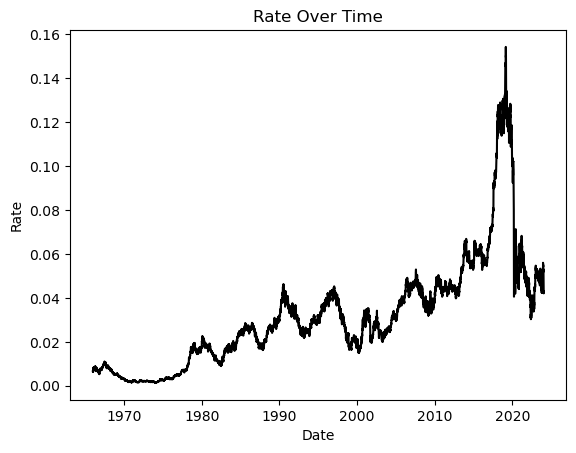

In [45]:
# Create a figure to visualize the Rate

# Plot the "rate" column
plt.plot(Boeing.index, Boeing["Rate"], label="Rate", color="black")

plt.xlabel("Date")
plt.ylabel("Rate")
plt.title("Rate Over Time")

plt.show()

Next, we update our model.

In [46]:
# n_estimators is increased and min_samples_split is reduced

model = RandomForestClassifier(n_estimators = 300, min_samples_split=50, random_state=42)

Next, we update our predict function.

In [47]:
# The prediction function is slightly changed
# Instead of .predict, .predict_proba is used
# With .predict_proba a probability on whether the stock price will go up or down is obtained
# With .predict only a 1 or 0 indicating if the stock went up or down was obtained
# The function returns a dataframe with actual direction values and model predictions

# In this function a threshold of 0.65 is applied to convert probabilities to binary predictions
# That is, the model will return that the price will go up if the probability of going up is at least 65%
# Thus, it is expected that the days predicted that the price will go up will be reduced but the probability that the price goes up in those days will increase

def predict(train, test, predictors, model, threshold=0.65):
    model.fit(train[predictors], train["Direction"])
    probabilities = model.predict_proba(test[predictors])[:, 1]
    predictions = (probabilities >= threshold).astype(int)
    
    comparison_table = pd.DataFrame({"Direction": test["Direction"], "Predictions": predictions})
    
    return comparison_table

In [48]:
# Perform a backtest on the data using the specified model and new predictors

predictions = backtest(Boeing, model, new_predictors)
# Takes some time

In [49]:
predictions

,Direction,Predictions,Comparison
Date,,,
1971-01-15 00:00:00-05:00,0,0,Correct
1971-01-18 00:00:00-05:00,0,0,Correct
1971-01-19 00:00:00-05:00,0,0,Correct
1971-01-20 00:00:00-05:00,1,0,Wrong
1971-01-21 00:00:00-05:00,1,0,Wrong
...,...,...,...
2024-01-10 00:00:00-05:00,0,0,Correct
2024-01-11 00:00:00-05:00,0,0,Correct
2024-01-12 00:00:00-05:00,0,0,Correct


In [50]:
# Count how many days the model predicted the stock will go up and down

predicted_1 = (predictions["Predictions"] == 1).sum()
predicted_0 = (predictions["Predictions"] == 0).sum()

print("Number of predictions of price rise:", predicted_1)
print("Number of predictions of price fall:", predicted_0)

Number of predictions of price rise: 62
Number of predictions of price fall: 13305


The number of predictions saying that the stock price will increase is much lower, as expected.

In [51]:
# Create a table that contains only the correct predictions when the price increased

correct_predictions = predictions[(predictions["Predictions"] == 1) & (predictions["Comparison"] == "Correct")]

In [52]:
correct_predictions

,Direction,Predictions,Comparison
Date,,,
1973-12-17 00:00:00-05:00,1,1,Correct
1973-12-24 00:00:00-05:00,1,1,Correct
1981-02-17 00:00:00-05:00,1,1,Correct
1986-01-20 00:00:00-05:00,1,1,Correct
1986-01-28 00:00:00-05:00,1,1,Correct
1986-09-30 00:00:00-04:00,1,1,Correct
1986-10-14 00:00:00-04:00,1,1,Correct
1991-11-15 00:00:00-05:00,1,1,Correct
1991-12-05 00:00:00-05:00,1,1,Correct


In [53]:
# Calculate the precsion

precision_score(predictions["Direction"], predictions["Predictions"])

0.6129032258064516

The precision score is higher now. It is around 60%.
<br>
The changes in the model has improved the model and increased it's predictive capability.

60 might seem like a low number of predictions however this is just for Boeing stock. There are thousands of stocks that can be predicted using the same method. Thus, we can conclude that the improved model has an impressive predictive capability.